In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving Absenteeism_at_work.xls to Absenteeism_at_work (2).xls


**Description of Dataset- **([https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work])

---
**Data Set Information:**

The data set allows for several new combinations of attributes and attribute exclusions, or the modification of the attribute type (categorical, integer, or real) depending on the purpose of the research.The data set (Absenteeism at work - Part I) was used in academic research at the Universidade Nove de Julho - Postgraduate Program in Informatics and Knowledge Management.



**Abstract:** The database was created with records of absenteeism at work from July 2007 to July 2010 at a courier company in Brazil.

Data Set Characteristics:  Multivariate, Time-Series

Number of Instances:740

Area: Business

Attribute Characteristics: Integer, Real

Number of Attributes: 21

Date Donated: 2018-04-05

Associated Tasks: Classification, Clustering

Missing Values: N/A

Number of Web Hits: 199702


Attribute Information:

1. Individual identification (ID)
2. Reason for absence (ICD).
Absences attested by the International Code of Diseases (ICD) stratified into 21 categories (I to XXI) as follows:

I Certain infectious and parasitic diseases
II Neoplasms
III Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism
IV Endocrine, nutritional and metabolic diseases
V Mental and behavioural disorders
VI Diseases of the nervous system
VII Diseases of the eye and adnexa
VIII Diseases of the ear and mastoid process
IX Diseases of the circulatory system
X Diseases of the respiratory system
XI Diseases of the digestive system
XII Diseases of the skin and subcutaneous tissue
XIII Diseases of the musculoskeletal system and connective tissue
XIV Diseases of the genitourinary system
XV Pregnancy, childbirth and the puerperium
XVI Certain conditions originating in the perinatal period
XVII Congenital malformations, deformations and chromosomal abnormalities
XVIII Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified
XIX Injury, poisoning and certain other consequences of external causes
XX External causes of morbidity and mortality
XXI Factors influencing health status and contact with health services.

And 7 categories without (CID) patient follow-up (22), medical consultation (23), blood donation (24), laboratory examination (25), unjustified absence (26), physiotherapy (27), dental consultation (28).
3. Month of absence
4. Day of the week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6))
5. Seasons (summer (1), autumn (2), winter (3), spring (4))
6. Transportation expense
7. Distance from Residence to Work (kilometers)
8. Service time
9. Age
10. Work load Average/day
11. Hit target
12. Disciplinary failure (yes=1; no=0)
13. Education (high school (1), graduate (2), postgraduate (3), master and doctor (4))
14. Son (number of children)
15. Social drinker (yes=1; no=0)
16. Social smoker (yes=1; no=0)
17. Pet (number of pet)
18. Weight
19. Height
20. Body mass index
21. Absenteeism time in hours (target

##################################################
First 5 rows of the dataset
##################################################
   ID  Reason for absence  ...  Body mass index  Absenteeism time in hours
0  11                  26  ...               30                          4
1  36                   0  ...               31                          0
2   3                  23  ...               31                          2
3   7                   7  ...               24                          4
4  11                  23  ...               30                          2

[5 rows x 21 columns]
##################################################
Statistical description of the dataset
##################################################
               ID  ...  Absenteeism time in hours
count  740.000000  ...                 740.000000
mean    18.017568  ...                   6.924324
std     11.021247  ...                  13.330998
min      1.000000  ...                   0.000000
25%   

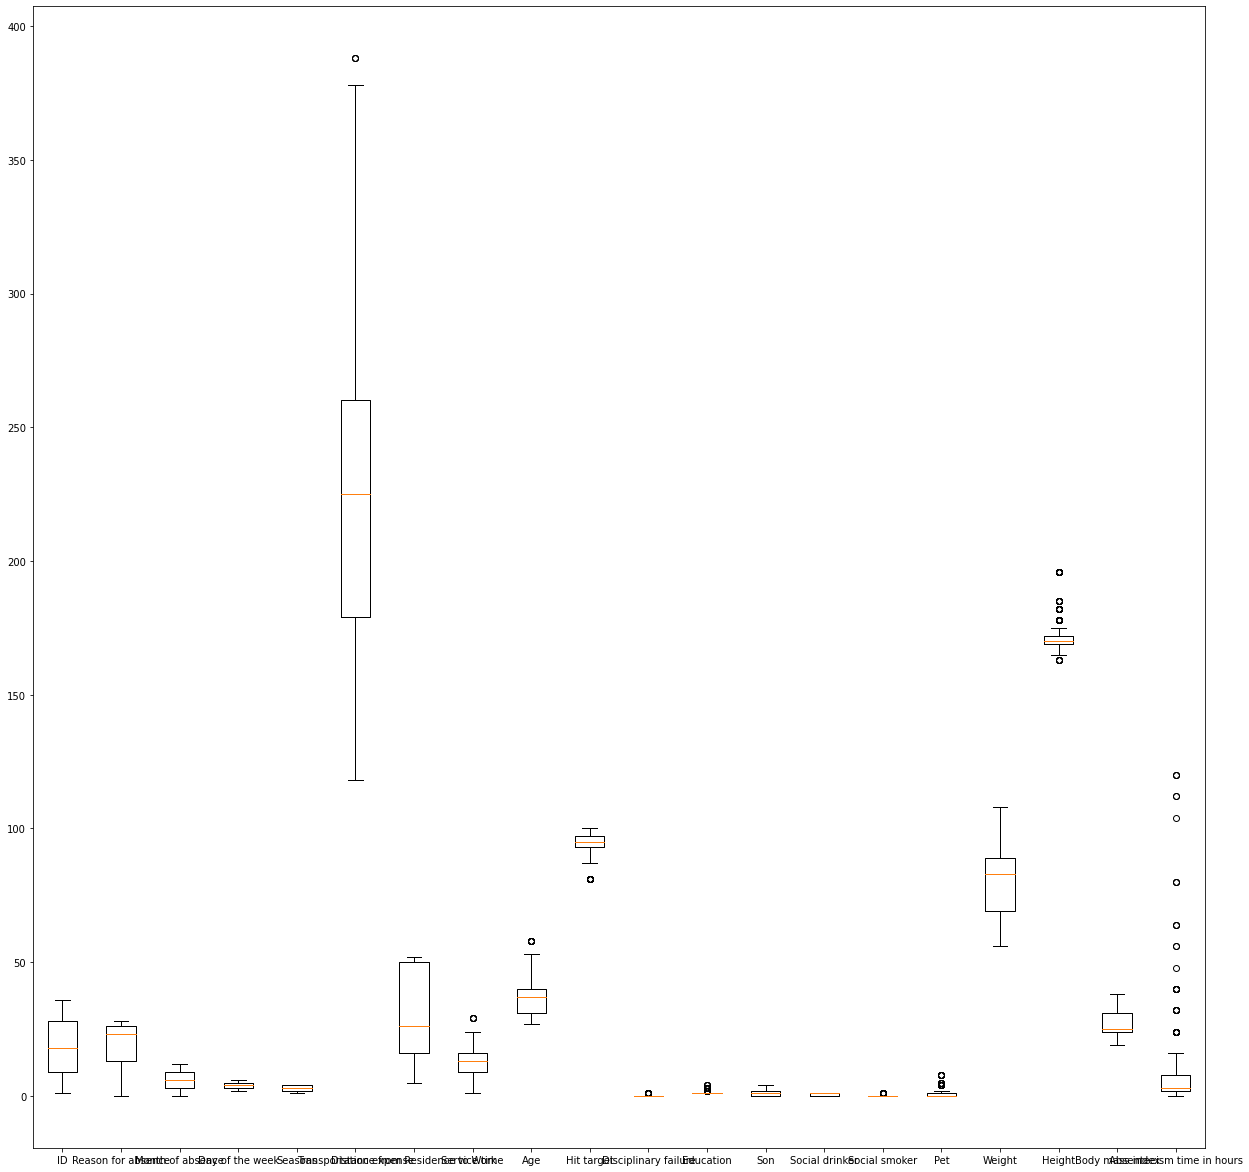

['ID', 'Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']
##################################################
After Min Max normalization
##################################################
     ID  Reason for absence  ...  Body mass index  Absenteeism time in hours
0    11                  26  ...                3                          1
1    36                   0  ...                6                          1
2     3                  23  ...                6                          1
3     7                   7  ...                6                          1
4    11                  23  ...                3                          1
..   ..                 ...  ...              ...  

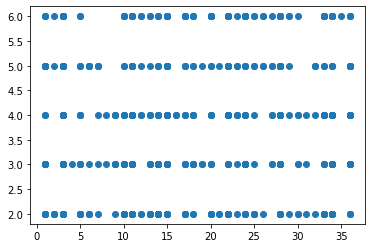

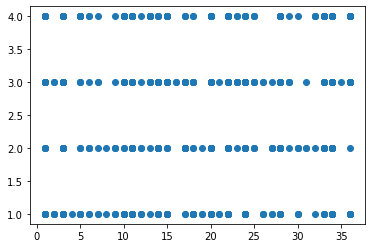

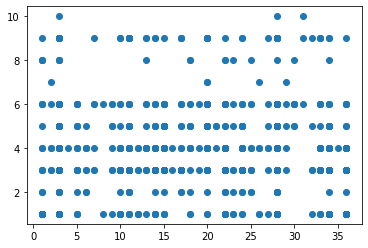

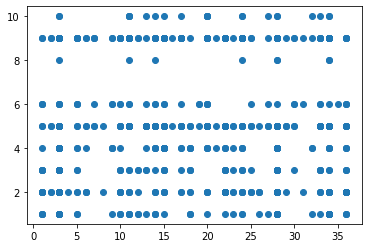

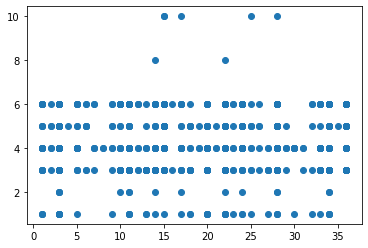

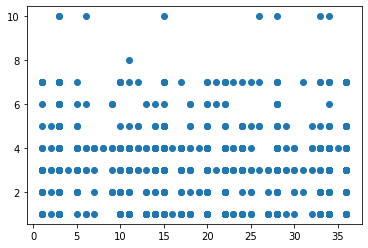

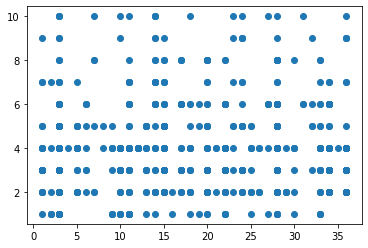

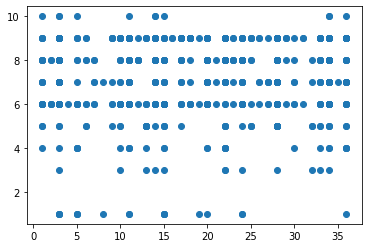

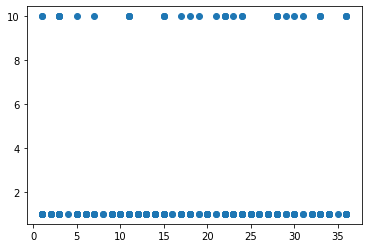

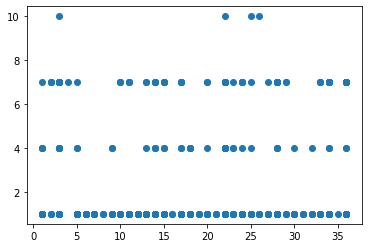

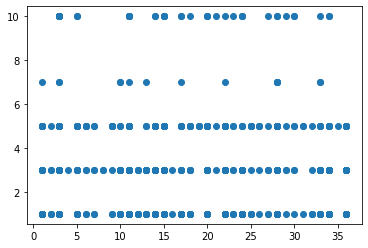

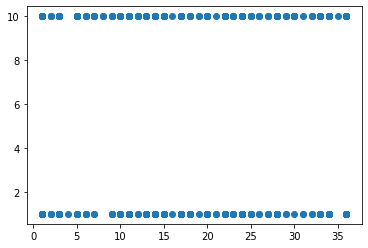

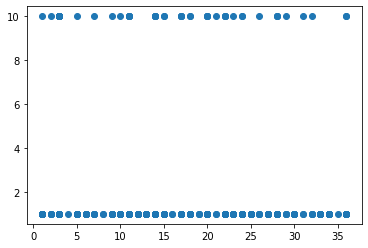

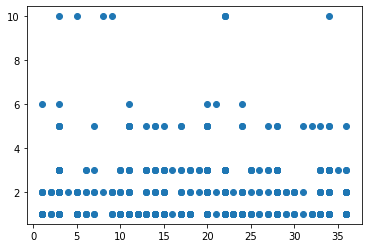

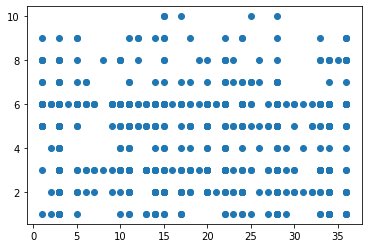

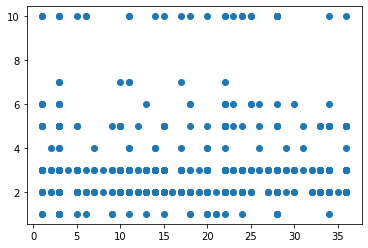

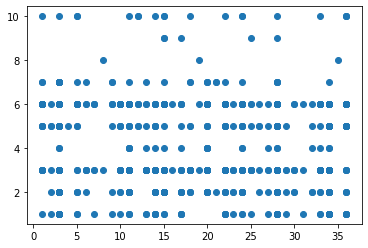

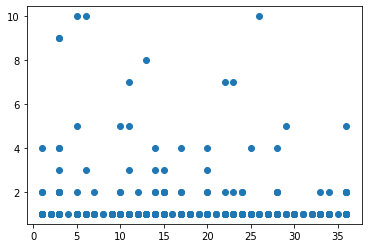

In [15]:
import statistics
import matplotlib.pyplot as plt 
#Load the dataset
df = pd.read_excel("Absenteeism_at_work.xls")
print("##################################################")
print("First 5 rows of the dataset")
print("##################################################")
print(df.head())
#Description of dataset
print("##################################################")
print("Statistical description of the dataset")
print("##################################################")
print(df.describe())
#find number of missing values in each column 
print("##################################################")
print("Number of missing values in each column")
print("##################################################")
print(df.isnull().sum())
#Replace the null values using median value
median1 = df['ID'].median()
median2 = df['Day of the week'].median()
median3 = df['Transportation expense'].median()
median4 = df['Age'].median()
median5 = df['Absenteeism time in hours'].median()
df['ID'].fillna(median1, inplace=True)
df['Day of the week'].fillna(median2, inplace=True)
df['Transportation expense'].fillna(median3, inplace=True)
df['Age'].fillna(median4, inplace=True)
df['Absenteeism time in hours'].fillna(median5, inplace=True)
print("##################################################")
print("Number of Null values after replace : " ,df.isnull().sum().sum())
print("##################################################")
print("BoxPlot fpr the condition attributes")
print("##################################################")
data = [df['ID'],df['Reason for absence'],df['Month of absence'],df['Day of the week'],df['Seasons'],df['Transportation expense'],df['Distance from Residence to Work'],df['Service time'],df['Age'],df['Hit target'],df['Disciplinary failure'],df['Education'],df['Son'],df['Social drinker'],df['Social smoker'],df['Pet'],df['Weight'],df['Height'],df['Body mass index'],df['Absenteeism time in hours']]
fig,ax = plt.subplots(figsize=(21,21)) 
ax.boxplot(data,labels=["ID","Reason for absence","Month of absence","Day of the week","Seasons","Transportation expense","Distance from Residence to Work","Service time","Age","Hit target","Disciplinary failure","Education","Son","Social drinker","Social smoker","Pet","Weight","Height","Body mass index","Absenteeism time in hours"]) 
plt.show()
#Min Max normalization
def minmaxnormalization(col,ll,ul):
  arr1 = []
  mean = df[col].mean()
  sd = statistics.stdev(df[col])
  max = df[col].max()
  min = df[col].min()
  for i in df[col]: 
    val = (i - min) / (max - min)
    val1 = val * (ul - ll)+ll
    arr1.append(val1)
   
  for  k in range(len(df)):
    df[col][k] = arr1[k-1]

columns = list(df)
print(columns)
for i in columns[5:]:
  minmaxnormalization(i,1,10)

print("##################################################")
print("After Min Max normalization")
print("##################################################")
print(df)

print("##################################################")
print("Scatter Plot")
print("##################################################")
for i in columns[3:]:
  plt.scatter(df['ID'],df[i])
#  plt.xlabel('Catagory') 
#  plt.ylabel(i) 
  plt.show()



**BoxPlot Analysis**
From the box it is clear that all the 11 attribute has outliers.The highest value and highest mean value is for the CREA attribute.Similarly the lowest mean is for CHOL attribute.
Data Transformation Technique,Normalization is done on conditional attribute and the value is changed to a range of 1 to 10.
Finally Scatter plot is used to visualize dataset attributes.Here the target attribute is 'Catagory', and in the scatter plot, all the conditional attribute is compared with this target Attribute 
